In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, classification_report

# 1. 데이터 로드 및 전처리
df = pd.read_csv('../data/uci-secom.csv')
features = df.drop(columns=['Time', 'Pass/Fail'])
median_values = features.median()
df_filled = features.fillna(median_values)
y = df['Pass/Fail'].replace(-1, 0)
X = df_filled

# 2. 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 모델 리스트 정의
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1) # verbose=-1 로 경고 메시지 제거
}

# 4. 각 모델 훈련 및 평가
for name, model in models.items():
    print(f"--- {name} 모델 훈련 및 평가 ---")
    try:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, pred_proba)
        f1 = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        print(f"AUC: {auc:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"Recall: {recall:.4f}")
        print("--- 성능 보고서 ---")
        print(classification_report(y_test, predictions, zero_division=0))
    except Exception as e:
        print(f"오류 발생: {e}")
    print("\n" + "="*50 + "\n")

--- Logistic Regression 모델 훈련 및 평가 ---


c:\Users\ygh04\Desktop\semiconductor_yield_project\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC: 0.6709
F1-Score: 0.0667
Recall: 0.0476
--- 성능 보고서 ---
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       293
           1       0.11      0.05      0.07        21

    accuracy                           0.91       314
   macro avg       0.52      0.51      0.51       314
weighted avg       0.88      0.91      0.89       314



--- Random Forest 모델 훈련 및 평가 ---
AUC: 0.7538
F1-Score: 0.0000
Recall: 0.0000
--- 성능 보고서 ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



--- Extra Trees 모델 훈련 및 평가 ---
AUC: 0.7114
F1-Score: 0.0000
Recall: 0.0000
--- 성능 보고서 ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.97   

c:\Users\ygh04\Desktop\semiconductor_yield_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:19:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC: 0.7062
F1-Score: 0.0000
Recall: 0.0000
--- 성능 보고서 ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



--- LightGBM 모델 훈련 및 평가 ---
AUC: 0.7546
F1-Score: 0.0000
Recall: 0.0000
--- 성능 보고서 ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314





--- 데이터 로드 및 전처리 ---
데이터 분할 완료.
--- 모델 훈련 ---
-> Logistic Regression 훈련 중...


c:\Users\ygh04\Desktop\semiconductor_yield_project\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-> Random Forest 훈련 중...
-> Extra Trees 훈련 중...
-> XGBoost 훈련 중...


c:\Users\ygh04\Desktop\semiconductor_yield_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


-> LightGBM 훈련 중...
모델 훈련 완료.
--- AUC 그래프 시각화 ---


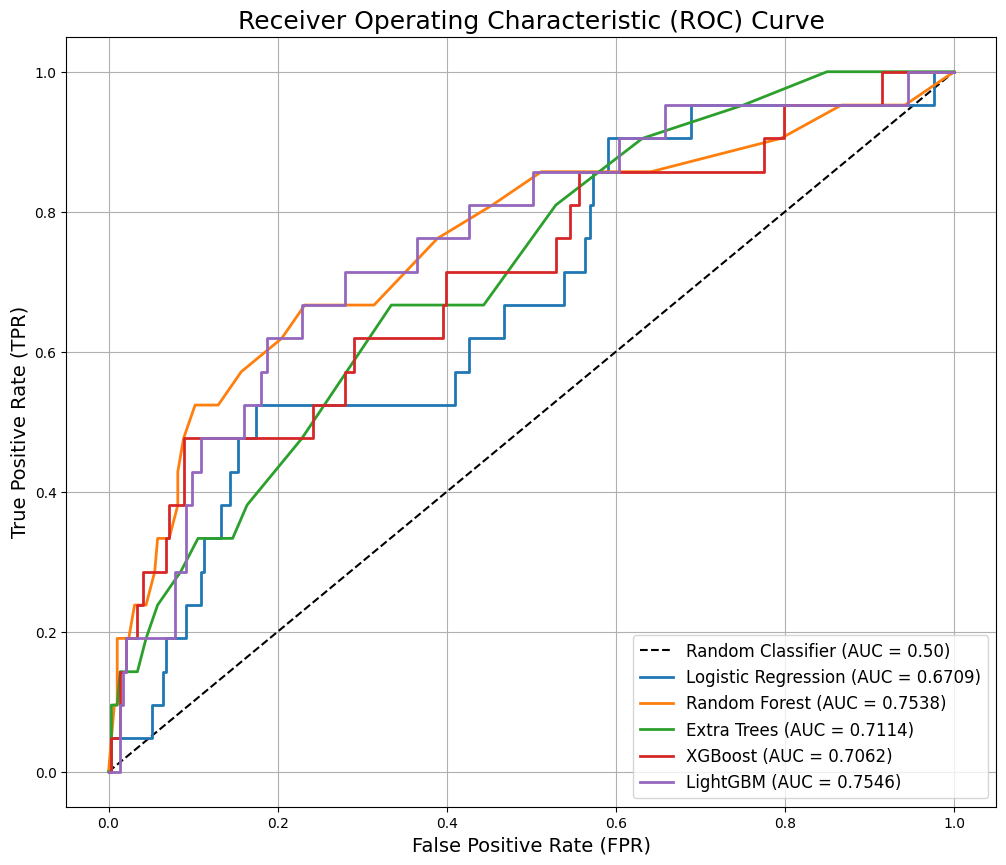

그래프 시각화 완료.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, classification_report, roc_curve

# 1. 데이터 로드 및 전처리
print("--- 데이터 로드 및 전처리 ---")
df = pd.read_csv('../data/uci-secom.csv')
features = df.drop(columns=['Time', 'Pass/Fail'])
median_values = features.median()
df_filled = features.fillna(median_values)
y = df['Pass/Fail'].replace(-1, 0)
X = df_filled

# 2. 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("데이터 분할 완료.")
print("="*50)


# 3. 모델 정의 및 훈련
print("--- 모델 훈련 ---")
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

# 훈련된 모델 객체를 저장할 딕셔너리
trained_models = {}

for name, model in models.items():
    print(f"-> {name} 훈련 중...")
    model.fit(X_train, y_train)
    trained_models[name] = model

print("모델 훈련 완료.")
print("="*50)


# 4. AUC(AROC) 그래프 시각화
print("--- AUC 그래프 시각화 ---")
plt.figure(figsize=(12, 10))
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

for name, model in trained_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

print("그래프 시각화 완료.")

In [3]:
import pandas as pd
import numpy as np

# imbalanced-learn 라이브러리에서 필요한 모델들을 임포트
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, OneSidedSelection
from imblearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, recall_score, classification_report

# 1. 데이터 로드 및 전처리 (이전과 동일)
df = pd.read_csv('../data/uci-secom.csv')
features = df.drop(columns=['Time', 'Pass/Fail'])
median_values = features.median()
df_filled = features.fillna(median_values)
y = df['Pass/Fail'].replace(-1, 0)
X = df_filled

# 2. 훈련 및 테스트 데이터 분할 (이전과 동일)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 모델 및 샘플링 기법 정의
# 주요 모델
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

# 샘플링 기법
samplers = {
    "No Sampling": None,  # 기준 모델을 위한 설정
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Tomek Links": TomekLinks(),
    "One-Sided Selection": OneSidedSelection(random_state=42)
}

# 4. 루프를 통해 모든 조합 훈련 및 평가
results = []

for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():
        print(f"--- 훈련 시작: {model_name} + {sampler_name} ---")

        # 샘플링 기법 적용
        if sampler:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train
        
        # 모델 훈련
        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        
        # 성능 지표 계산
        pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, pred_proba)
        f1 = f1_score(y_test, predictions, zero_division=0)
        recall = recall_score(y_test, predictions, zero_division=0)
        
        # 결과 저장
        results.append({
            "Model": model_name,
            "Sampling": sampler_name,
            "AUC": auc,
            "F1-Score": f1,
            "Recall": recall
        })

        print(f"AUC: {auc:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"Recall: {recall:.4f}")
        print("\n" + "="*50 + "\n")

# 5. 결과 정리 및 출력
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Recall", ascending=False)
print("--- 최종 모델별 성능 비교 ---")
print(results_df)

--- 훈련 시작: Random Forest + No Sampling ---
AUC: 0.7538
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: Random Forest + SMOTE ---
AUC: 0.7941
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: Random Forest + ADASYN ---
AUC: 0.8087
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: Random Forest + Tomek Links ---
AUC: 0.7495
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: Random Forest + One-Sided Selection ---
AUC: 0.7346
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: LightGBM + No Sampling ---
AUC: 0.7546
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: LightGBM + SMOTE ---
AUC: 0.7019
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: LightGBM + ADASYN ---
AUC: 0.6642
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: LightGBM + Tomek Links ---
AUC: 0.8011
F1-Score: 0.0000
Recall: 0.0000


--- 훈련 시작: LightGBM + One-Sided Selection ---
AUC: 0.7881
F1-Score: 0.0000
Recall: 0.0000


--- 최종 모델별 성능 비교 ---
           Model             Sampling       AUC  F1-Score  Recall
0  Random Forest          No Sampling  0.753779       

In [4]:
import pandas as pd
import numpy as np

# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, classification_report

# 1. 데이터 로드 및 전처리
df = pd.read_csv('../data/uci-secom.csv')
features = df.drop(columns=['Time', 'Pass/Fail'])
median_values = features.median()
df_filled = features.fillna(median_values)
y = df['Pass/Fail'].replace(-1, 0)
X = df_filled

# 2. 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 클래스 가중치 계산
class_0_count = np.sum(y_train == 0) # 양품 개수
class_1_count = np.sum(y_train == 1) # 불량품 개수
scale_pos_weight = class_0_count / class_1_count

print(f"클래스 비율 (0:1) = {class_0_count}:{class_1_count}")
print(f"LightGBM의 scale_pos_weight: {scale_pos_weight:.2f}")

# 4. 모델 훈련 (클래스 가중치 적용)
print("\n--- 클래스 가중치를 적용한 모델 훈련 ---")

# Random Forest 모델
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_balanced.fit(X_train, y_train)

# LightGBM 모델
lgbm_model_weighted = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=-1)
lgbm_model_weighted.fit(X_train, y_train)

# 5. 모델 성능 평가
print("\n--- 모델 성능 평가 (클래스 가중치 적용 후) ---")

# Random Forest
print("--- Random Forest 모델 성능 ---")
rf_pred = rf_model_balanced.predict(X_test)
rf_pred_proba = rf_model_balanced.predict_proba(X_test)[:, 1]
print(f"AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print("\n" + classification_report(y_test, rf_pred, zero_division=0))

# LightGBM
print("\n--- LightGBM 모델 성능 ---")
lgbm_pred = lgbm_model_weighted.predict(X_test)
lgbm_pred_proba = lgbm_model_weighted.predict_proba(X_test)[:, 1]
print(f"AUC: {roc_auc_score(y_test, lgbm_pred_proba):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred):.4f}")
print("\n" + classification_report(y_test, lgbm_pred, zero_division=0))

클래스 비율 (0:1) = 1170:83
LightGBM의 scale_pos_weight: 14.10

--- 클래스 가중치를 적용한 모델 훈련 ---

--- 모델 성능 평가 (클래스 가중치 적용 후) ---
--- Random Forest 모델 성능 ---
AUC: 0.7143
F1-Score: 0.0000
Recall: 0.0000

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314


--- LightGBM 모델 성능 ---
AUC: 0.7101
F1-Score: 0.0000
Recall: 0.0000

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    recall_score,
    classification_report,
    precision_recall_curve
)

# 1. 데이터 로드 및 전처리
print("--- 1. 데이터 로드 및 전처리 ---")
df = pd.read_csv('../data/uci-secom.csv')
features = df.drop(columns=['Time', 'Pass/Fail'])
median_values = features.median()
df_filled = features.fillna(median_values)
y = df['Pass/Fail'].replace(-1, 0)
X = df_filled
print("전처리 완료.")
print("="*50)

# 2. 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")
print("훈련 데이터의 클래스 비율:\n", y_train.value_counts(normalize=True))
print("="*50)

# 3. 클래스 가중치 계산 및 모델 훈련
print("--- 3. 클래스 가중치 적용 및 모델 훈련 ---")
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)
scale_pos_weight = class_0_count / class_1_count

# Random Forest 모델
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_balanced.fit(X_train, y_train)

# LightGBM 모델
lgbm_model_weighted = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=-1)
lgbm_model_weighted.fit(X_train, y_train)

print("모델 훈련 완료.")
print("="*50)

# 4. 최적 임계값 탐색 및 모델 재평가
print("--- 4. 최적 임계값 탐색 및 모델 재평가 ---")

# 최적 임계값으로 모델을 평가하는 함수 정의
def evaluate_with_threshold(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # F1-Score를 최대화하는 최적의 임계값 찾기
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_threshold = thresholds[np.argmax(f1_scores)]
    
    # 최적 임계값을 사용하여 최종 예측
    final_predictions = (y_pred_proba >= best_threshold).astype(int)
    
    # 성능 보고서 출력
    print(f"\n--- {model_name} (최적 임계값 {best_threshold:.4f}) ---")
    print("AUC:", round(roc_auc_score(y_test, y_pred_proba), 4))
    print("F1-Score:", round(f1_score(y_test, final_predictions), 4))
    print("Recall:", round(recall_score(y_test, final_predictions), 4))
    print("\n" + classification_report(y_test, final_predictions, zero_division=0))
    print("="*50)

# 두 모델에 대해 함수 실행
evaluate_with_threshold(rf_model_balanced, X_test, y_test, "Random Forest")
evaluate_with_threshold(lgbm_model_weighted, X_test, y_test, "LightGBM")

--- 1. 데이터 로드 및 전처리 ---
전처리 완료.
훈련 데이터 크기: (1253, 590), 테스트 데이터 크기: (314, 590)
훈련 데이터의 클래스 비율:
 Pass/Fail
0    0.933759
1    0.066241
Name: proportion, dtype: float64
--- 3. 클래스 가중치 적용 및 모델 훈련 ---
모델 훈련 완료.
--- 4. 최적 임계값 탐색 및 모델 재평가 ---

--- Random Forest (최적 임계값 0.1100) ---
AUC: 0.7143
F1-Score: 0.2414
Recall: 0.3333

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       293
           1       0.19      0.33      0.24        21

    accuracy                           0.86       314
   macro avg       0.57      0.62      0.58       314
weighted avg       0.90      0.86      0.88       314


--- LightGBM (최적 임계값 0.0045) ---
AUC: 0.7101
F1-Score: 0.2857
Recall: 0.3333

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       293
           1       0.25      0.33      0.29        21

    accuracy                           0.89       314
   macro avg       0.60      0.63      0.61       314
w